In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm
#import plotly.plotly as py
import seaborn as sns
from sklearn import linear_model
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans, MeanShift
import statsmodels.tsa.stattools as tsa

%matplotlib inline

/Users/wenhaohu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
with pd.HDFStore("../train.h5", "r") as df:
    train = df.get("train")

In [4]:
mean_values = train.mean(axis=0)
# train.fillna(mean_values, inplace=True)
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0,NaN,-0.007338


In [5]:
train_a = train.dropna(axis=0)
train_f = train.fillna(train.mean())
train_f

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-6.316399e-03,0.222831,-0.213030,0.729277,-0.335633,1.132921e-01,1.621238,...,0.775208,-9.103397e-02,-8.156685e-02,-7.287001e-02,-0.414776,0.005236,-1.699966e-02,-2.000000e+00,0.000388,-0.011753
1,11,0,0.014765,-3.806422e-02,-0.017425,0.320652,-0.034134,0.004413,1.142851e-01,-0.210185,...,0.025590,-9.103397e-02,-8.156685e-02,-7.287001e-02,-0.273607,0.005236,-1.699966e-02,-2.000000e+00,0.000388,-0.001240
2,12,0,-0.010622,-5.057707e-02,3.379575,-0.157525,-0.068550,-0.155937,1.219439e+00,-0.764516,...,0.151881,-9.103397e-02,-8.156685e-02,-7.287001e-02,-0.175710,0.005236,-1.699966e-02,-2.000000e+00,0.000388,-0.020940
3,25,0,-4.536046,7.729436e+11,-0.332033,-0.504601,18.016613,0.178495,-5.703754e+08,-0.007262,...,1.035936,-9.103397e-02,-8.156685e-02,-7.287001e-02,-0.211506,0.005236,-1.699966e-02,-2.000000e+00,0.000388,-0.015959
4,26,0,0.176693,-2.528418e-02,-0.057680,0.015100,0.180894,0.139445,-1.256869e-01,-0.018707,...,0.630232,-9.103397e-02,-8.156685e-02,-7.287001e-02,-0.001957,0.005236,-1.699966e-02,0.000000e+00,0.000388,-0.007338
5,27,0,0.346856,1.662393e-01,-6.080701,-0.992249,-0.125916,0.345812,-5.703754e+08,-0.584239,...,-0.379366,-9.103397e-02,-8.156685e-02,-7.287001e-02,-0.001957,0.005236,-1.699966e-02,-2.000000e+00,0.000388,0.031425
6,31,0,0.072036,1.493100e-02,-0.332033,0.014063,18.016613,-0.193205,-5.703754e+08,-0.162295,...,1.232558,-9.103397e-02,-8.156685e-02,-7.287001e-02,0.350685,0.005236,-1.699966e-02,-2.000000e+00,0.000388,-0.032895
7,38,0,0.300062,7.125116e-02,-0.074451,-0.065292,-0.011286,0.026365,2.102487e-01,0.167494,...,0.242646,-9.103397e-02,-8.156685e-02,-7.287001e-02,-0.168077,0.005236,-1.699966e-02,-2.000000e+00,0.000388,0.015803
8,39,0,-0.003511,-3.427023e-02,0.082372,-0.023937,-0.025750,0.007815,2.634512e-01,-0.241212,...,0.186175,-9.103397e-02,-8.156685e-02,-7.287001e-02,-0.300842,0.005236,-1.699966e-02,-2.000000e+00,0.000388,-0.027593
9,40,0,-0.083330,8.193488e-02,-2.048438,-0.206856,-0.839563,-0.234100,-2.918531e-01,-5.722336,...,-0.021965,-9.103397e-02,-8.156685e-02,-7.287001e-02,-0.386579,0.005236,-1.699966e-02,-2.000000e+00,0.000388,0.006662


In [6]:
train.describe()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,1710756.000000,1710756.000000,1637797.000000,1.629727e+06,1312105.000000,1561285.000000,1304298.000000,1686809.000000,1.031686e+06,1341916.000000,...,1708204.000000,1.691591e+06,1.691591e+06,1.690740e+06,1708520.000000,1666567.000000,1.690755e+06,1.706070e+06,1473977.000000,1710756.000000
mean,1093.857903,945.625677,-4.536046,7.729436e+11,-0.332033,-0.504601,18.016613,-0.020409,-5.703754e+08,-0.162295,...,-0.085848,-9.103397e-02,-8.156685e-02,-7.287001e-02,0.049083,0.005236,-1.699966e-02,-9.735299e-01,0.000388,0.000222
std,630.856268,519.568520,249.738230,7.620606e+13,65.198102,102.074928,925.835974,0.249486,7.502322e+10,3.668150,...,0.612585,2.471038e-01,2.346534e-01,2.235729e-01,0.310232,0.113373,2.116284e-01,9.605551e-01,0.030120,0.022406
min,0.000000,0.000000,-20174.966797,-7.375435e-02,-9848.879883,-34341.757812,-8551.914062,-2.344957,-1.043737e+13,-1077.101318,...,-1.687572,-1.000000e+00,-1.000000e+00,-1.000000e+00,-0.525090,-0.444953,-1.000000e+00,-2.000000e+00,-0.126569,-0.086094
25%,550.000000,504.000000,-0.144971,-2.956479e-02,-0.059675,-0.165583,-0.105705,-0.199654,-1.960470e-01,-0.228097,...,-0.405030,-4.651562e-04,-1.992532e-04,-2.203252e-05,-0.152170,-0.073770,-3.887695e-15,-2.000000e+00,-0.019988,-0.009561
50%,1098.000000,956.000000,-0.000837,5.523058e-03,0.021095,0.002476,0.011752,-0.040645,-7.395084e-03,-0.030291,...,-0.085021,-3.951567e-12,-1.418487e-13,-1.591224e-16,-0.014768,0.000098,0.000000e+00,-6.597540e-01,0.000011,-0.000157
75%,1657.000000,1401.000000,0.119911,1.078554e-01,0.195221,0.303724,0.155646,0.130382,1.832071e-01,0.176475,...,0.190960,-5.219879e-40,0.000000e+00,0.000000e+00,0.177242,0.078557,0.000000e+00,-5.188884e-08,0.020471,0.009521
max,2158.000000,1812.000000,3252.526855,1.068448e+16,3823.001221,1239.737427,67859.648438,1.378195,5.203165e+02,76.771248,...,49.577576,0.000000e+00,0.000000e+00,0.000000e+00,1.569265,0.684483,1.000000e+00,0.000000e+00,0.143586,0.093498


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710756 entries, 0 to 1710755
Columns: 111 entries, id to y
dtypes: float32(109), int16(2)
memory usage: 730.9 MB


In [65]:
cols = [col for col in train_f.columns if col not in ['y','id','timestamp']]
cors = []
for col in cols:
    cors.append(np.corrcoef(train_f[col],train_f['y'])[0,1])

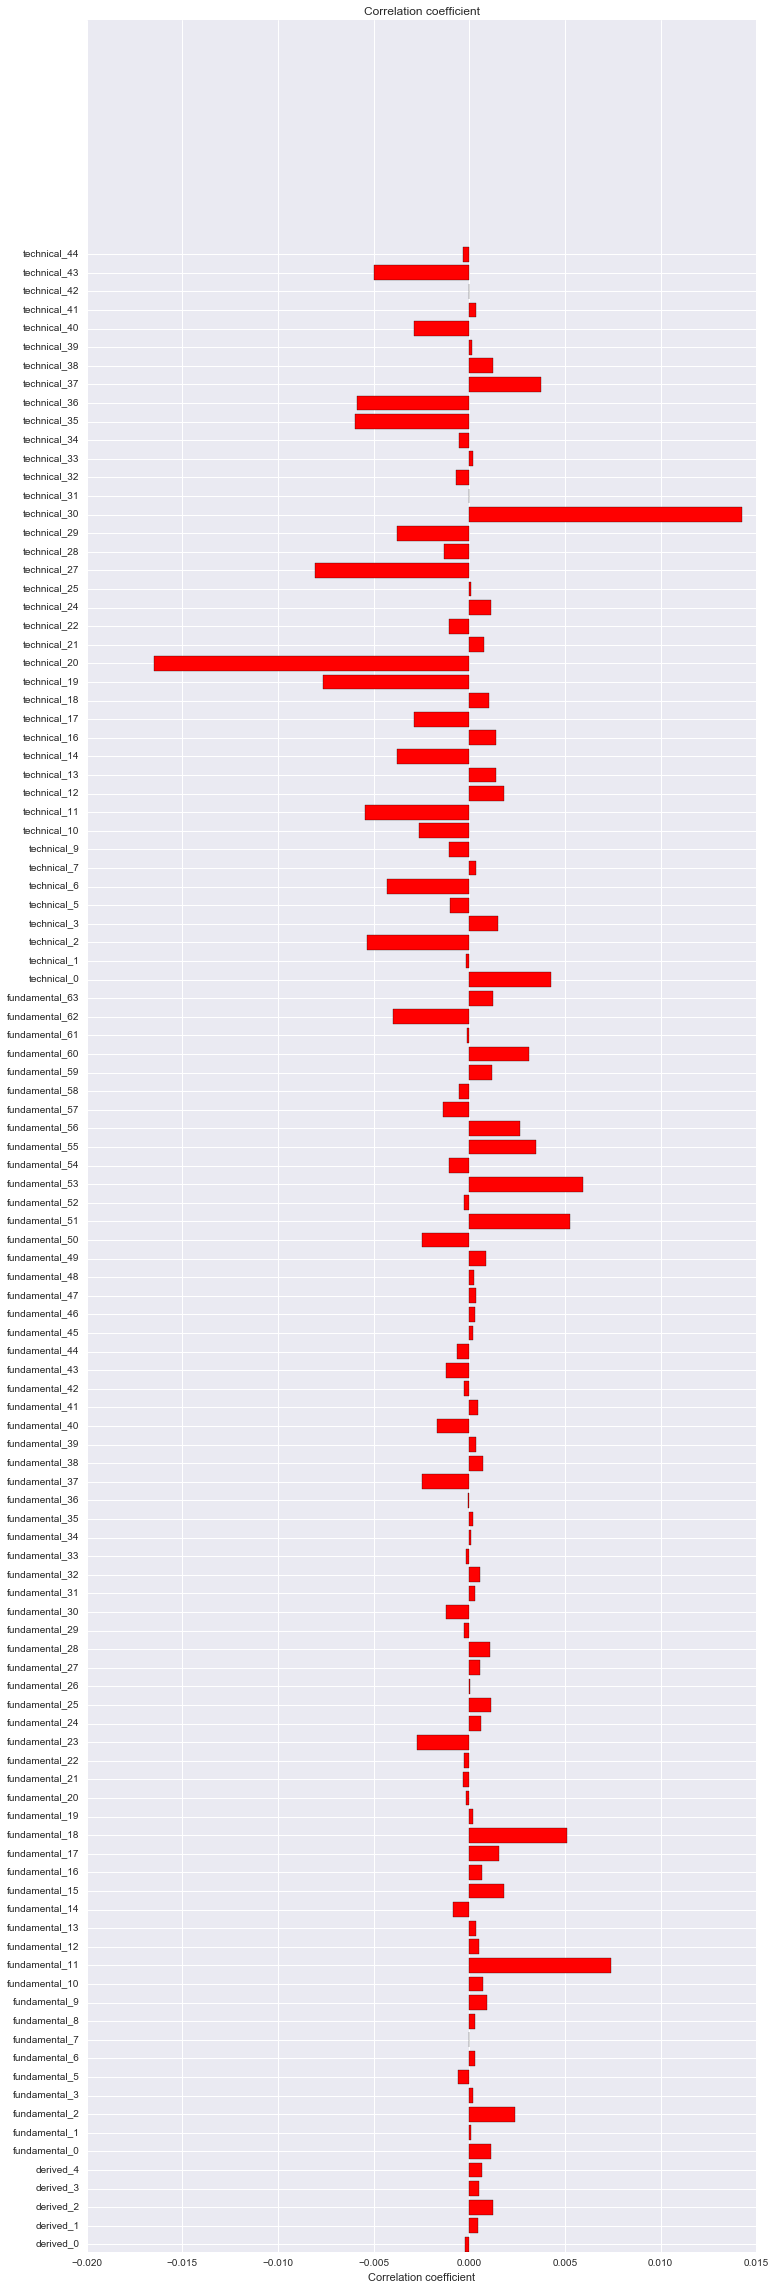

In [9]:
fig, ax = plt.subplots(figsize=(12,40))
ind = np.arange(len(cols))
ax.barh(ind,np.array(cors),color='r')
ax.set_yticks(ind+0.4)
ax.set_yticklabels(cols,rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")

In [10]:
cors_sort = pd.DataFrame(abs(np.array(cors)), index=cols).sort(0, ascending=False)
cors_sort.head()

/Users/wenhaohu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0
technical_20,0.016507
technical_30,0.014248
technical_27,0.008085
technical_19,0.007641
fundamental_11,0.007381


In [66]:
cols_to_use = ['technical_20', 'technical_19', 'technical_30', 'technical_27', 'fundamental_11']

In [12]:
ID = train['id'].unique()
ID.sort()
variances = []
means = []
for i in ID:
    means.append((train['y'][train['id']==i]).mean())
    variances.append((train['y'][train['id']==i]).var())

In [18]:
y_ID = train['y'][train['id']==ID[0]]
t_ID = train['timestamp'][train['id']==ID[0]]
y_ID = y_ID.to_frame(str(ID[0]))
y_ID.index = t_ID.values
for i in ID[1:]:
    y_temp = train['y'][train['id']==i]
    t_temp = train['timestamp'][train['id']==i]
    y_temp = y_temp.to_frame(str(i))
    y_temp.index = t_temp.values
    y_ID = pd.concat([y_ID,y_temp],axis=1)
totT = y_ID.shape[0]
y_ID.head()
# index is timestamp, column is ID

,0,6,7,10,11,12,13,14,15,16,...,2146,2148,2149,2150,2151,2152,2154,2155,2156,2158
0,NaN,NaN,NaN,-0.011753,-0.001240,-0.020940,NaN,NaN,NaN,NaN,...,0.053261,-0.015025,-0.016335,NaN,NaN,0.015117,-0.016151,NaN,-0.011723,NaN
1,NaN,NaN,NaN,0.005850,-0.002024,-0.020101,NaN,NaN,NaN,NaN,...,-0.014437,0.005291,-0.044970,NaN,NaN,0.003364,0.028860,NaN,0.007955,NaN
2,NaN,NaN,NaN,-0.000476,0.008788,0.029279,NaN,NaN,NaN,NaN,...,-0.032205,0.035890,-0.004481,NaN,NaN,0.005643,-0.001618,NaN,-0.001697,NaN
3,NaN,NaN,NaN,0.005212,-0.006551,0.021253,NaN,NaN,NaN,NaN,...,-0.049026,0.004440,0.014595,NaN,NaN,0.007670,0.010709,NaN,-0.008659,NaN
4,NaN,NaN,NaN,-0.077211,-0.004336,-0.026892,NaN,NaN,NaN,NaN,...,0.028881,-0.031858,0.008682,NaN,NaN,-0.010907,-0.002909,NaN,0.002236,NaN


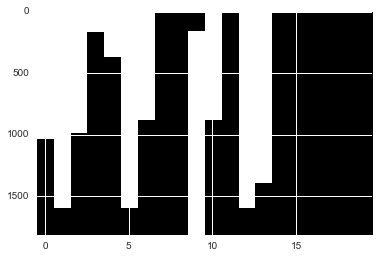

In [19]:
plt.imshow(y_ID.iloc[:,range(10,30)].isnull(), aspect='auto',
           cmap=plt.cm.gray, interpolation='nearest')

In [20]:
NaN_By_ID = train[train['id']==ID[0]]
NaN_By_ID = NaN_By_ID[cols]
NaN_By_ID = ((totT-NaN_By_ID.count(axis=0))/totT).to_frame(ID[0]).transpose()
for i in ID[1:]:
    temp = train[train['id']==i]
    temp = temp[cols]
    temp = ((totT-temp.count(axis=0))/totT).to_frame(i).transpose()
    NaN_By_ID = NaN_By_ID.append(temp)
NaN_By_ID
#The ratio of NaN value in different features for each Ids

,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,...,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44
0,0.093767,0.093767,0.093767,0.093767,0.093767,0.093767,0.159956,0.093767,0.093767,0.093767,...,0.093767,0.093767,0.093767,0.093767,0.093767,0.093767,0.115279,0.093767,0.093767,0.192499
6,0.600662,0.600662,0.600662,0.600662,0.600662,0.600662,1.000000,0.600662,0.600662,1.000000,...,0.600662,0.600662,0.600662,0.600662,0.600662,0.600662,0.619967,0.600662,0.600662,0.699945
7,0.150579,0.150579,0.150579,0.150579,0.150579,0.150579,0.150579,0.150579,0.178158,1.000000,...,0.150579,0.150579,0.150579,0.150579,0.150579,0.150579,0.169884,0.150579,0.150579,0.249311
10,0.936018,0.936018,0.936018,0.936018,0.936018,0.936018,0.936018,0.936018,0.936018,1.000000,...,0.936018,0.936018,0.947601,0.947601,0.947601,0.936018,0.949255,0.947601,0.936018,1.000000
11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011583,0.011583,0.011583,0.000000,0.013238,0.011583,0.000000,0.091009
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103144,1.000000,...,0.000000,0.000000,0.011583,0.011583,0.011583,0.000000,0.013238,0.011583,0.000000,0.091009
13,0.150579,0.150579,1.000000,0.150579,1.000000,0.150579,0.150579,1.000000,1.000000,1.000000,...,0.150579,0.150579,0.150579,0.150579,0.150579,0.150579,0.169884,0.150579,0.150579,0.249311
14,0.881964,0.881964,1.000000,0.881964,1.000000,0.881964,0.881964,1.000000,1.000000,1.000000,...,0.881964,0.881964,0.881964,0.881964,0.881964,0.881964,0.902923,0.881964,0.881964,0.980143
15,0.263100,0.263100,1.000000,0.263100,1.000000,0.263100,0.263100,1.000000,1.000000,1.000000,...,0.263100,0.263100,0.263100,0.263100,0.263100,0.263100,0.282956,0.263100,0.263100,0.361280
16,0.039162,0.039162,0.039162,0.039162,0.039162,0.039162,0.039162,0.039162,0.039162,0.039162,...,0.039162,0.039162,0.039162,0.039162,0.039162,0.039162,0.059018,0.039162,0.039162,0.138445


In [21]:
kk = 20
kmeans = KMeans(n_clusters=kk, init='k-means++', random_state=0).fit(NaN_By_ID)
kmeans_labels = pd.Series(kmeans.labels_, index = ID)

([<matplotlib.axis.XTick at 0x14f22ebd0>,
 <a list of 21 Text xticklabel objects>)

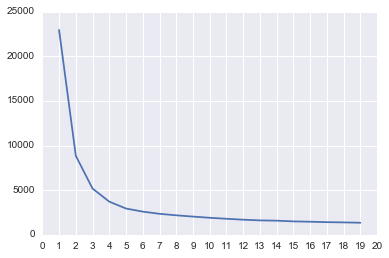

In [22]:
distortion = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0).fit(NaN_By_ID)
    distortion.append(kmeans.inertia_)
plt.plot(range(1,20),distortion)
plt.xticks(range(0,21))

(0, -1000)

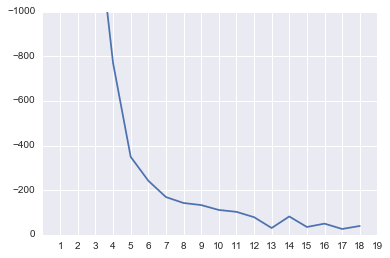

In [23]:
plt.plot(range(1,19), np.diff(distortion))
plt.xticks(range(1,20))
plt.ylim(0,-1000)

In [24]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans.fit_predict(NaN_By_ID)

array([1, 5, 1, ..., 3, 3, 0], dtype=int32)

In [25]:
meanshift = MeanShift().fit(NaN_By_ID)
meanshift_labels = pd.Series(meanshift.labels_, index = ID)

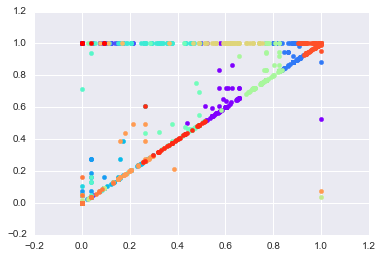

In [26]:
colors = iter(cm.rainbow(np.linspace(0, 1, kk)))
for y in range(kk):
    plt.scatter(NaN_By_ID[kmeans_labels == y]['fundamental_0'],NaN_By_ID[kmeans_labels == y]['derived_4'], color=next(colors))

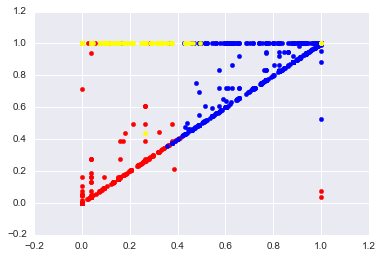

In [27]:
plt.scatter(NaN_By_ID[meanshift_labels == 0]['fundamental_0'],NaN_By_ID[meanshift_labels == 0]['derived_4'], color='red')
plt.scatter(NaN_By_ID[meanshift_labels == 1]['fundamental_0'],NaN_By_ID[meanshift_labels == 1]['derived_4'], color='blue')
plt.scatter(NaN_By_ID[meanshift_labels == 2]['fundamental_0'],NaN_By_ID[meanshift_labels == 2]['derived_4'], color='yellow')

In [28]:
NaN_By_ID[kmeans_labels == 0]

,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,...,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44
6,0.600662,0.600662,0.600662,0.600662,0.600662,0.600662,1.000000,0.600662,0.600662,1.000000,...,0.600662,0.600662,0.600662,0.600662,0.600662,0.600662,0.619967,0.600662,0.600662,0.699945
17,0.722008,0.760066,0.572532,0.900165,0.722008,0.572532,1.000000,0.572532,0.572532,0.572532,...,0.572532,0.572532,0.572532,0.572532,0.572532,0.572532,0.593491,0.572532,0.572532,0.671263
19,0.544402,0.544402,0.544402,0.544402,0.544402,0.544402,0.544402,0.544402,0.591285,1.000000,...,0.544402,0.544402,0.544402,0.544402,0.544402,0.544402,0.564810,0.544402,0.544402,0.642581
119,0.519029,0.530612,0.530612,0.725869,0.519029,0.519029,1.000000,0.519029,0.519029,1.000000,...,0.519029,0.519029,0.530612,0.530612,1.000000,0.519029,0.532267,1.000000,1.000000,0.610039
129,1.000000,1.000000,0.746277,1.000000,1.000000,0.623276,1.000000,0.623276,1.000000,1.000000,...,0.623276,0.623276,0.634859,0.634859,0.634859,0.623276,0.636514,0.634859,0.623276,0.714286
159,0.544402,0.544402,0.544402,0.544402,0.544402,0.544402,1.000000,0.544402,0.544402,1.000000,...,0.544402,0.544402,0.544402,0.544402,0.544402,0.544402,0.564810,0.544402,0.544402,0.642581
170,0.600662,0.600662,1.000000,0.835080,0.600662,0.600662,1.000000,1.000000,1.000000,1.000000,...,0.600662,0.600662,0.600662,0.600662,0.600662,0.600662,0.619967,0.600662,0.600662,0.699945
231,0.512962,0.512962,0.512962,0.512962,0.512962,0.512962,1.000000,0.512962,0.701048,0.512962,...,0.512962,0.512962,0.524545,0.524545,0.524545,0.512962,0.526200,0.524545,0.512962,0.603971
270,0.577496,0.589079,0.577496,0.577496,0.577496,0.577496,1.000000,0.577496,0.577496,1.000000,...,0.577496,0.577496,0.589079,0.589079,0.589079,0.577496,0.590734,0.589079,0.577496,0.668505
271,1.000000,1.000000,1.000000,1.000000,1.000000,0.499724,1.000000,0.499724,1.000000,1.000000,...,0.499724,0.499724,0.499724,0.499724,0.499724,0.499724,0.519581,0.499724,0.554330,0.599007


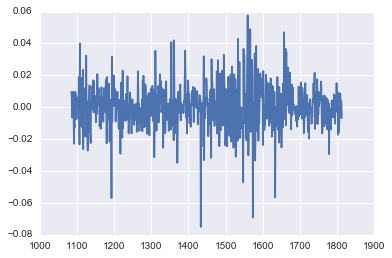

In [29]:
y = train['y'][train['id']==ID[1]]
x = train['timestamp'][train['id']==ID[1]]
plt.plot(x,y)
# a example of timestamp versus y which doesn't have any trend

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16a470210>]], dtype=object)

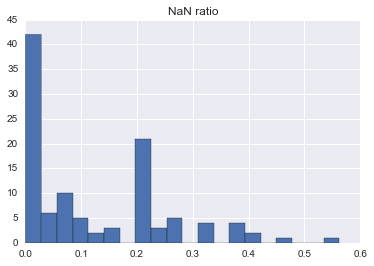

In [30]:
# proportion of NaN in each feature
NaN_rate = ((train.shape[0]-train.count(axis=0))/train.shape[0])[2:].to_frame("NaN ratio")
NaN_rate.hist(bins=20)

In [31]:
# ADF test to check the stationarity of y
stationary = 0
nonstationary = []
for i in ID[1:]:
    if i not in [435,1056] and (train['y'][train['id']==i]).count()>10:
        y = train['y'][train['id']==i]
        d_order0=tsa.adfuller(y)
        # print('adf: ', d_order0[0] )
        # print('p-value: ', d_order0[1])
        # print('Critical values: ', d_order0[4])
        if d_order0[0]> d_order0[4]['5%']: 
            nonstationary.append(i)
        else:
            stationary = stationary+1
# show how many number is stationary
print(stationary)
# show the id that is nonstationary
print(nonstationary)

1397
[62, 173, 226, 277, 538, 546, 767, 861, 882, 1089, 1265, 1276, 1314, 1320, 1431, 1506, 1699, 1726, 1809, 1906, 2063, 2076]


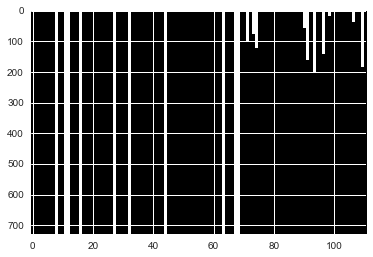

In [32]:
plt.imshow(train[train['id']== ID[1]].isnull(), aspect='auto', cmap=plt.cm.gray, interpolation='nearest')

In [33]:
nonstationary

[62,
 173,
 226,
 277,
 538,
 546,
 767,
 861,
 882,
 1089,
 1265,
 1276,
 1314,
 1320,
 1431,
 1506,
 1699,
 1726,
 1809,
 1906,
 2063,
 2076]

(array([ 2.,  2.,  0.,  1.,  0.,  2.,  0.,  4.,  2.,  0.,  3.,  5.,  3.,
         5.,  6.,  4.,  9.,  5.,  6.,  5.,  8.,  4.,  4.,  4.,  7.,  2.,
         8.,  4.,  6.,  4.,  5.,  4.,  1.,  2.,  0.,  3.,  1.,  4.,  0.,
         1.,  1.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  5.]),
 array([ -4.28321771e-02,  -4.08846060e-02,  -3.89370348e-02,
         -3.69894636e-02,  -3.50418924e-02,  -3.30943212e-02,
         -3.11467501e-02,  -2.91991789e-02,  -2.72516077e-02,
         -2.53040365e-02,  -2.33564654e-02,  -2.14088942e-02,
         -1.94613230e-02,  -1.75137518e-02,  -1.55661806e-02,
         -1.36186095e-02,  -1.16710383e-02,  -9.72346711e-03,
         -7.77589594e-03,  -5.82832476e-03,  -3.88075358e-03,
         -1.93318240e-03,   1.43887741e-05,   1.96195995e-03,
          3.90953113e-03,   5.85710231e-03,   7.80467348e-03,
          9.75224466e-03,   1.16998158e-02

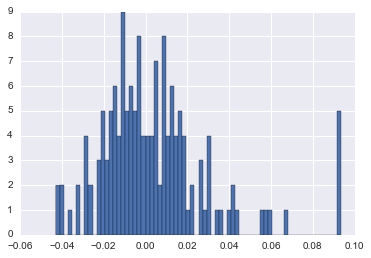

In [34]:
plt.hist(y,bins=70)

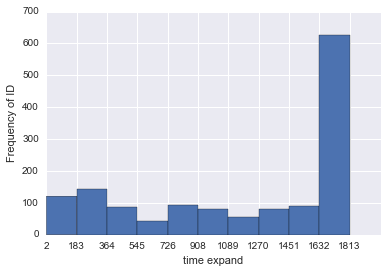

In [35]:
# Histogram of time expand, which indicate that more than 600 IDs have more than 1500 timestamps
# and around 100 IDs have less than 183 timestamps
plt.hist(y_ID.count(),bins=10)
plt.xticks([    2. ,   183.1,   364.2,   545.3,   726.4,   907.5,  1088.6,
         1269.7,  1450.8,  1631.9,  1813. ])
plt.xlabel('time expand')
plt.ylabel('Frequency of ID')

(0, 10)

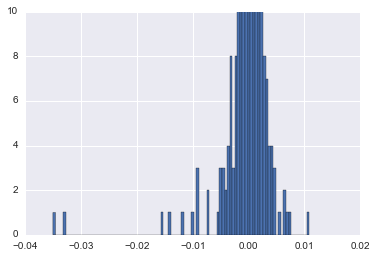

In [36]:
plt.hist(means,bins=100)
plt.ylim([0,10])

(0, 10)

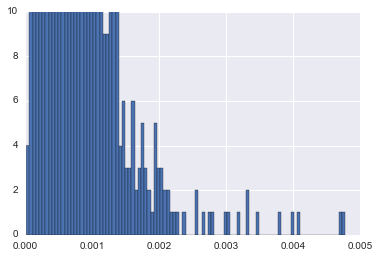

In [37]:
plt.hist(variances,bins=100)
plt.ylim([0,10])

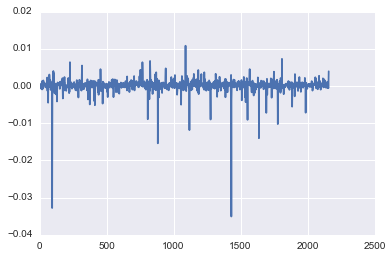

In [38]:
plt.plot(ID, means)

(-0.04, 0.02)

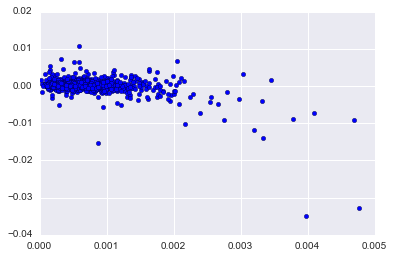

In [39]:
plt.scatter(variances,means)
plt.xlim([0,0.005])
plt.ylim([-0.04,0.02])

In [40]:
# LASSO attempts
clf = linear_model.Lasso(alpha=0.1)
clf.set_params(max_iter=2000)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=2000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
clf.fit(train_f[cols], train_f['y'])
print(clf.coef_)

KeyboardInterrupt: 

In [ ]:
train.loc[train['timestamp']<500,'timestamp'].hist(bins=100)
plt.xlim([0,500])

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(train_f[cols_to_use], train_f['y'],
                                                    test_size=0.3, random_state=0)

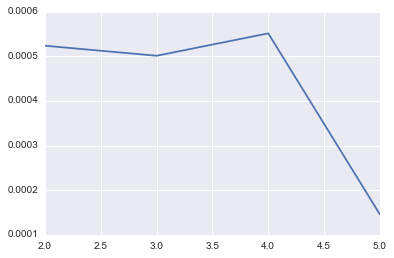

In [68]:
r2_dt = []
dep = 6
for i in range(2, dep):
    dt = DecisionTreeRegressor(max_depth=i, random_state=0)
    dt.fit(X_train, y_train)
    y_test_pred = dt.predict(X_test)
    r2_dt.append(r2_score(y_test, y_test_pred))
plt.plot(range(2, dep), r2_dt)

In [69]:
print("R2 of decision tree is {}".format(r2_score(y_test, y_test_pred)))

R2 of decision tree is 0.000145795443721


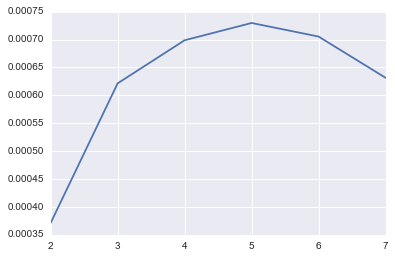

In [70]:
from sklearn.ensemble import RandomForestRegressor
r2_rf = []
dep = 8
for i in range(2, dep):
    rf = RandomForestRegressor(max_depth=i, random_state=0)
    rf.fit(X_train, y_train)
    y_test_pred = rf.predict(X_test)
    r2_rf.append(r2_score(y_test, y_test_pred))
plt.plot(range(2, dep), r2_rf)
# print("R2 of random forest is {}".format(r2_score(y_test, y_test_pred)))

In [ ]:
r2_rf

In [ ]:
y_train.values

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train['technical_20'].reshape(-1,1), y_train.values)
y_train_pred = LR.predict(X_train['technical_20'].reshape(-1,1))
y_test_pred = LR.predict(X_test['technical_20'].reshape(-1,1))
print(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred))

In [ ]:
y_train.shape

In [ ]:
train['y'].min()

In [ ]:
train.isnull().sum(axis=0)

In [ ]:
sell = [i for i in np.sort(train['id'].unique()) if train['timestamp'][train['id']==i].max()!=1812]

In [218]:
ymedian_dict = dict(train_f.groupby(["id"])['y'].median())

def get_weighted_y(series):
    ID, y = series["id"], series["y"]
    return 0.95 * y + [0.05 * y_median_dict[j] if j in y_median_dict else y[i] for i,j in enumerate(ID)]

get_weighted_y(train_f).clip(train['y'].min(),train['y'].max())

0         -0.011272
1         -0.001191
2         -0.019899
3         -0.015164
4         -0.006942
5          0.029871
6         -0.031267
7          0.015017
8         -0.026210
9          0.006344
10        -0.001826
11         0.047636
12        -0.018043
13        -0.005034
14        -0.006058
15         0.016848
16        -0.001066
17        -0.008267
18         0.038718
19        -0.003780
20        -0.010754
21         0.041971
22         0.001333
23        -0.011446
24        -0.067322
25        -0.001713
26        -0.011973
27         0.028196
28         0.029224
29        -0.015502
             ...   
1710726    0.007922
1710727   -0.002917
1710728   -0.001093
1710729    0.003045
1710730   -0.018223
1710731    0.000360
1710732   -0.012085
1710733   -0.002042
1710734    0.032525
1710735   -0.007658
1710736   -0.032225
1710737   -0.001062
1710738   -0.003325
1710739    0.005341
1710740   -0.026464
1710741   -0.015774
1710742    0.008335
1710743    0.001921
1710744    0.023879


In [172]:
y_median_dict = dict(train_f.groupby(["id"])['y'].median())

In [ ]:
import xgboost

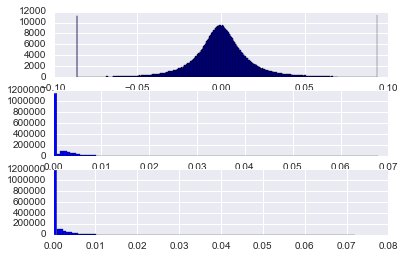

In [53]:
plt.figure(figsize=(10,15))
f, plots = plt.subplots(3,1)
plots[0].hist(train_f['y'],bins=1000,color='blue')
plots[1].hist(train_f['technical_20'],bins=100,color='blue')
plots[2].hist(train_f['technical_30'],bins=100,color='blue')
plt.show()

In [55]:
sum(train_f['technical_20']>0.01)

35557

In [56]:
train_f.shape

(1710756, 111)

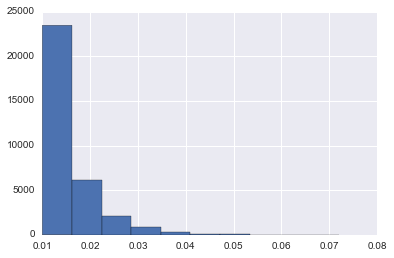

In [62]:
train_f['technical_30'][train_f['technical_30']>0.01].hist()